In [314]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sklearn
import graphviz
import joblib
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition,datasets,preprocessing,svm,metrics
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import RANSACRegressor,HuberRegressor,LinearRegression
from sklearn.svm import SVR,SVC
from sklearn.model_selection import train_test_split,cross_val_score,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,classification_report,r2_score,f1_score,jaccard_score,jaccard_similarity_score,accuracy_score,confusion_matrix,silhouette_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,Lasso,Ridge,LinearRegression,ElasticNet
from sklearn.externals.six import StringIO
from IPython.display import SVG
from sklearn.cluster import KMeans,MiniBatchKMeans,SpectralClustering,AgglomerativeClustering,DBSCAN
from IPython.display import IFrame
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix

%matplotlib inline

Helpful info:

https://www.kaggle.com/getting-started/132533

https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html#sphx-glr-auto-examples-decomposition-plot-pca-3d-py

### Pizza Dataset: https://data.world/sdhilip/pizza-datasets

In [399]:
pizza = pd.read_csv("pizza.csv")
pizza.head() # id -- Sample analysed

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [316]:
pizza.shape

(300, 9)

In [317]:
labels = pizza['brand']  # brand -- Pizza brand (class label)
classes = pizza['brand'].unique()
print(classes)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']


In [400]:
pizza['brand'].value_counts()

H    33
J    32
D    32
B    31
F    30
I    29
G    29
A    29
E    28
C    27
Name: brand, dtype: int64

In [319]:
le1 = preprocessing.LabelEncoder()
pizza['brand'] = le1.fit_transform(pizza['brand'])
labels = pizza['brand']
classes = pizza['brand'].unique()
print(classes)

[0 1 2 3 4 5 6 7 8 9]


In [320]:
pizza['brand'].value_counts()

7    33
9    32
3    32
1    31
5    30
8    29
6    29
0    29
4    28
2    27
Name: brand, dtype: int64

In [321]:
pizza_no_id = pizza.drop(columns='id').copy() # df.drop(df.columns[['A', 'B']], axis=1, inplace=True)
pizza_no_id.head(2)

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84


In [322]:
pizza_no_id.shape

(300, 8)

In [323]:
pizza_no_id.isnull().sum()

brand     0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [324]:
pizza_no_id.dtypes

brand       int64
mois      float64
prot      float64
fat       float64
ash       float64
sodium    float64
carb      float64
cal       float64
dtype: object

In [325]:
pizza_no_brand = pizza_no_id.drop(columns='brand').copy()
pizza_no_brand.head(3)

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95


In [326]:
pizza_no_brand.shape

(300, 7)

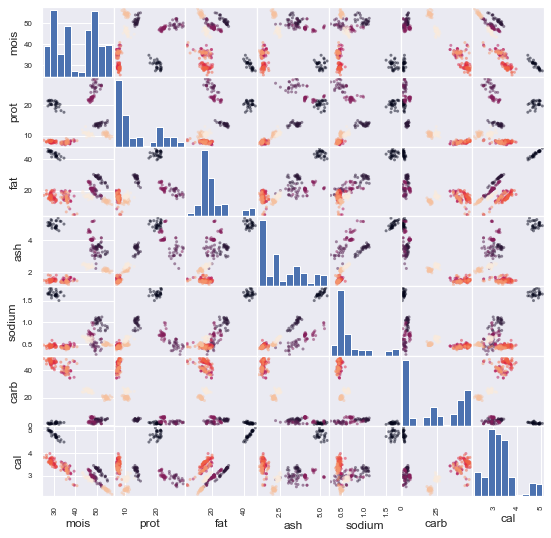

In [331]:
d = pd.plotting.scatter_matrix(pizza_no_brand, c = pizza.brand, figsize = (9, 9))
# I would like to assign the colors to the different pizza brands such that I don't have to guess from the table.
# For example, dark grey is brand = 0.

In [330]:
#statsBrand = pizza_no_id.groupby('brand').agg({'mean', 'std', 'min', 'max', 'count'}).T
#statsBrand

# I would like to group the data by stats and not by variables: mean for mois,prot,etc; std for mois,prot,etc
statsBrand = pizza_no_id.groupby('brand').agg({'mean', 'std'}).T
statsBrand

# I would like to have the stats averaged over the variables:
# statsBrand1= pizza_no_id.agg({'mean', 'std', 'min', 'max', 'count'}) # Instead of T, average per variable.
# statsBrand1
# statsPerBrand_2 = statsBrand.groupby('brand').agg(['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'])
# statsPerBrand_2

brand                0          1          2          3          4          5  \
mois   mean  29.966207  51.307742  49.477407  47.671250  36.083214  29.404333   
       std    1.955413   1.728696   1.509749   1.138275   1.755293   0.922264   
prot   mean  20.107241  13.638710  26.025556  22.231250   7.732857   7.898000   
       std    1.079441   0.509913   1.205728   1.389281   0.394357   0.219441   
fat    mean  43.446897  27.620323  19.171111  21.645312  15.115714  16.424667   
       std    1.863102   2.182310   2.425016   2.411228   4.107434   2.239385   
ash    mean   5.014483   3.463548   3.283333   4.315938   1.476071   1.473667   
       std    0.204443   0.237817   0.409042   0.449773   0.097879   0.087039   
sodium mean   1.656207   0.984839   0.464815   0.715000   0.449286   0.462000   
       std    0.064665   0.098009   0.091120   0.114863   0.034203   0.032313   
carb   mean   1.486897   3.969677   2.046296   4.136250  39.592143  44.787333   
       std    0.619724   0.614456   0.818653   1.784172   3.178393   1.753430   
cal    mean   4.773793   3.190968   2.848889   3.003438   3.253929   3.596000   
       std    0.163629   0.171976   0.176294   0.152836   0.254447   0.153749   

brand                6          7          8          9  
mois   mean  28.241034  35.825152  54.592759  46.035000  
       std    1.506134   1.382209   0.979143   1.395033  
prot   mean   8.236552   7.894545  10.383103  10.566250  
       std    0.188021   0.422604   0.543120   0.643658  
fat    mean  15.643793  14.291515  13.060690  16.324062  
       std    1.889167   3.589726   0.919087   1.130172  
ash    mean   1.446897   1.406061   2.098276   2.364688  
       std    0.105834   0.129806   0.075691   0.096352  
sodium mean   0.443793   0.416061   0.487241   0.614375  
       std    0.023055   0.022492   0.023588   0.041109  
carb   mean  46.431724  40.583939  19.865517  24.735938  
       std    1.672413   2.605006   0.956122   1.055975  
cal    mean   3.595172   3.224545   2.384138   2.878437  
       std    0.134314   0.220809   0.072777   0.098737

In [21]:
sc_x = StandardScaler()
sc_x.fit(pizza_no_brand.values)
X_scaled = sc_x.transform(pizza_no_brand.values)
X_scaled.shape

(300, 7)

[5.95968842e-01 3.27208198e-01 5.92231918e-02 1.35963182e-02
 3.95385973e-03 4.82299078e-05 1.35982576e-06]

The first two components explain ~93% of the variability in the types of pizza. Let's visualize it:


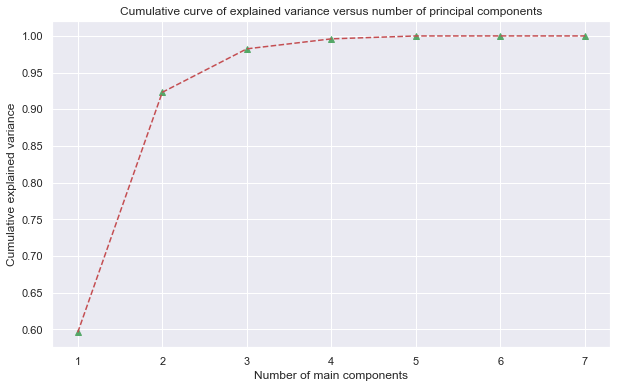

In [405]:
sklearn_pca = PCA(n_components = None) # Mas o menos se asigna un componente por variable aunque no son los mismos.
sklearn_transf = sklearn_pca.fit_transform(X_scaled)
varianza_expl = sklearn_pca.explained_variance_ratio_
print(varianza_expl)
#s = list(zip(varianza_expl, pizza_no_brand.columns)) # No hacer zip porque no es correcto
print()
print("The first two components explain ~93% of the variability in the types of pizza. Let's visualize it:")
cum_var_exp = np.cumsum(varianza_expl)
plt.figure(figsize = (10, 6))
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative curve of explained variance versus number of principal components')
nc = np.arange(1, varianza_expl.shape[0] + 1)
plt.plot(nc, cum_var_exp, 'g^')
plt.plot(nc, cum_var_exp, '--r')
plt.show()

### Regularizacion:

In [177]:
linear = LinearRegression().fit(x_train, y_train)
linear_pred = linear.predict(x_test)

lasso = Lasso(alpha=0.02).fit(x_train, y_train) # alpha = lambda in equation, and is directly proport to penalty
lasso_pred = lasso.predict(x_test)

ridge = Ridge(alpha=1).fit(x_train, y_train) # default alpha = 1 
ridge_pred = ridge.predict(x_test)

elastic = ElasticNet(random_state=0).fit(x_train, y_train)
elastic_pred = elastic.predict(x_test)

linear_loss = mean_squared_error(y_test, linear_pred)
lasso_loss = mean_squared_error(y_test, lasso_pred)
ridge_loss = mean_squared_error(y_test, ridge_pred)
elastic_loss = mean_squared_error(y_test, elastic_pred)

print(f'Linear loss: {linear_loss}')
print(f'Lasso loss: {lasso_loss}')
print(f'Ridge loss: {ridge_loss}')
print(f'ElasticNet loss: {elastic_loss}')

print('-'*32)
print('coefficients')
print(f'Lasso: {lasso.coef_}')
print(f'Ridge: {ridge.coef_}')
print(f'ElasticNet: {elastic.coef_}')

Linear loss: 6.334035093946527
Lasso loss: 2.3255820022253166
Ridge loss: 2.31389940910359
ElasticNet loss: 2.378854317945683
--------------------------------
coefficients
Lasso: [ 0.02664623 -0.23016456 -0.19915446  0.44588153  0.          0.
 -0.        ]
Ridge: [ 0.06086673 -0.19125443 -0.15488376  0.57040602  0.16874568  0.04649949
 -0.23906758]
ElasticNet: [ 0.08955046 -0.10460919 -0.09971111  0.          0.          0.05985898
 -0.        ]


Lasso loss is used when there are not so many features as in this case.
However, I am using other regularization models to compare the results.
Both lasso and ridge provide more weight to the fourth feature (ash), all others were strongly penalized.

#### From the scatterplot it can be seen that there are different correlations among variables. Let's check:

### Regression fitting: First identify if there are outliers

#### Method 1: Using visuals

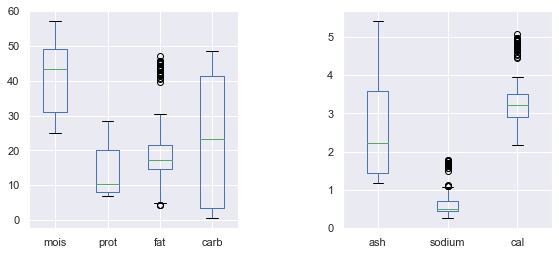

In [23]:
pizza_plot1 = pizza_no_brand.drop(['ash','sodium','cal'], axis = 1)
pizza_plot2 = pizza_no_brand.drop(['mois','prot','fat', 'carb'], axis = 1)
fig = plt.figure(figsize=(15,4))
ax0=fig.add_subplot(131)
ax1=fig.add_subplot(132)
pizza_plot1.boxplot(ax = ax0)
pizza_plot2.boxplot(ax = ax1)

fig.subplots_adjust(wspace = 0.5)
#plt.show()

There seem to be outliers in fat, sodium, and cal. Let's verify it.

#### Method 2: Using stats
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [332]:
#pizza_no_id[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']].agg(['mean', 'std', 'min', 'max', 'count'])
describeBasicStats = pizza_no_brand.describe()
describeBasicStats

,mois,prot,fat,ash,sodium,carb,cal
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,40.903067,13.373567,20.229533,2.633233,0.669400,22.864767,3.271000
std,9.552987,6.434392,8.975658,1.269724,0.370358,18.029722,0.620034
min,25.000000,6.980000,4.380000,1.170000,0.250000,0.510000,2.180000
25%,30.902500,8.060000,14.770000,1.450000,0.450000,3.467500,2.910000
50%,43.300000,10.440000,17.135000,2.225000,0.490000,23.245000,3.215000
75%,49.115000,20.022500,21.435000,3.592500,0.702500,41.337500,3.520000
max,57.220000,28.480000,47.200000,5.430000,1.790000,48.640000,5.080000


In [333]:
outlierFat1 = pizza_no_brand['fat'].max() > abs(pizza_no_brand['fat'].mean() + 3 * pizza_no_brand['fat'].std())
outlierFat2 = pizza_no_brand['fat'].min() < abs(pizza_no_brand['fat'].mean() - 3 * pizza_no_brand['fat'].std())
outlierNa1 = pizza_no_brand['sodium'].max() > abs(pizza_no_brand['sodium'].mean() + 3 * pizza_no_brand['sodium'].std())
outlierNa2 = pizza_no_brand['sodium'].min() < abs(pizza_no_brand['sodium'].mean() - 3 * pizza_no_brand['sodium'].std())
outlierCal1 = pizza_no_brand['cal'].max() > abs(pizza_no_brand['cal'].mean() + 3 * pizza_no_brand['cal'].std())
outlierCal2 = pizza_no_brand['cal'].min() < abs(pizza_no_brand['cal'].mean() - 3 * pizza_no_brand['cal'].std())

In [334]:
print('Outliers in the column fat: ' + str(outlierFat1) + ', ' + str(outlierFat2))
print('Outliers in the column sodium: ' + str(outlierNa1) + ', ' + str(outlierNa2))
print('Outliers in the column cal: ' + str(outlierCal1) + ', ' + str(outlierCal2))
"""The graph misleads by showing: Many upper ourliers in cal, std * 3 = 1.86 + mean = 5.13, max = 5.08 (No outliers).
and the lower outliers of sodium cannot be seen, std * 3 = 1.11 - mean = 0.44, min = 0.25"""

Outliers in the column fat: True, True
Outliers in the column sodium: True, True
Outliers in the column cal: False, False


'The graph misleads by showing: Many upper ourliers in cal, std * 3 = 1.86 + mean = 5.13, max = 5.08 (No outliers).\nand the lower outliers of sodium cannot be seen, std * 3 = 1.11 - mean = 0.44, min = 0.25'

#### _Mejor es usar F-value_

### Regression fitting:

In [210]:
x1 = pizza_no_id.values[:, 1:8] # pizza_no_id[:, 1:8] Incorrect synthax, to slice use .values
print(type(x1)) # Using .values converts x to a numpy.ndarray

x = pizza_no_brand # This definition of x maintains it as a pandas.core.frame.DataFrame
print(type(x))

y = pizza_no_id['brand']
print(type(y))

x.head(2)

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


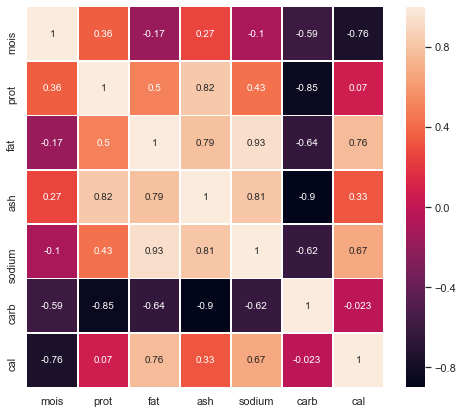

In [214]:
corr = x.corr()
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
ax.autoscale(enable=True) # To fix scale 

There are some variables with positive regression for example ash with sodium, fat, and protein.

#### Do Normalization or standardScaler adjusting:

Not so sure if I should use Normalizer, StandardScaler, or none.
There are ~100x differences max. among values, but there are no large numbers.
I am going to train/test data and do iterative processes (Normalization), however the variables have different units and in this case it makes more sense to work by columns. Thus, I will apply an StandardScaler:

https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [ ]:
# And See:
# <img src = "StandardScaler_Normalizer_Brief.png" style = "width:500px;height:500px/">

### Robust regressors and parametric optimization:

For more:

https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f

https://www.saedsayad.com/support_vector_machine_reg.htm

https://scikit-learn.org/stable/auto_examples/linear_model/plot_huber_vs_ridge.html

In [370]:
X = StandardScaler().fit_transform(x)  # To normalize the data, it also converts x into a ndarray
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 7), (60, 7), (240,), (60,))

In [371]:
estimators = {
    'RANSAC': RANSACRegressor(), # Metaestimator
    'HUBER': HuberRegressor(epsilon=1.35),
    'RANFORR': RandomForestRegressor(n_estimators = 14, max_depth = 9)} # n_est = # trees

In [376]:
for key, value in estimators.items():
    value.fit(X_train, y_train)
    y_pred = value.predict(X_test)
    print('-'*32)
    print(key)
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"r2_Score: {r2_score(y_pred, y_test)}") # or, r2_score(y_pred,y)

--------------------------------
RANSAC
MSE: 6.545012203872906
r2_Score: -1.1638386703526518
--------------------------------
HUBER
MSE: 4.30874422538344
r2_Score: 0.09230166662397887
--------------------------------
RANFORR
MSE: 0.7820570672713529
r2_Score: 0.8840721574909192


The best prediction is for regression is obtained with Random Forest algorithm.

### Grid Search (Checking for the best parameters):

In [391]:
x = pizza_no_brand
y = pizza_no_id['brand']

In [392]:
print(type(y))

<class 'pandas.core.series.Series'>


In [393]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [422]:
algorithms1 = {'RANFORR': RandomForestRegressor()}
parameters1 = {'RANFORR': {'n_estimators':[4],'max_depth':[2],'criterion':['mse','mae']}}
best_score1 = 999 
best_model1 = None

In [423]:
for key,value in algorithms1.items():
    grid_regressor = GridSearchCV(value, parameters1[key], cv=3, iid=True).fit(x,y.values.ravel())
    score=np.abs(grid_regressor.best_score_)
    if score < best_score1:
        best_score1=score
        best_model1=grid_regressor.best_estimator_
print(best_score1)
print(best_model1)
model_name=str(best_model1)
model_name=model_name.split('(')[0]

10.054911462690198
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=4, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)


In [428]:
algorithms2 = {
    'SupportVectorRegressor': SVR(),
    'GBR': GradientBoostingRegressor()}
parameters2 = {
    'SupportVectorRegressor': {'gamma':['auto','scale'],'C':[1,5],'epsilon':[0.1],'kernel':['linear','poly']},
    'GBR': {'loss':['ls','lad'],'learning_rate':[0.05,0.1]}}

In [429]:
best_score2 = 999 
best_model2 = None

In [430]:
for key,value in algorithms2.items():
    grid_regressor = GridSearchCV(value, parameters2[key], cv=3, iid=True).fit(x,y.values.ravel())
    score=np.abs(grid_regressor.best_score_)
    if score < best_score2:
        best_score2=score
        best_model2=grid_regressor.best_estimator_
print(best_score2)
print(best_model2)
model_name=str(best_model2)
model_name=model_name.split('(')[0]

10.0787322780559
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


The best prediction obtained with grid search was with GBR model.

In [431]:
joblib.dump(best_model, f'pizza_{model_name}.pkl')

['pizza_GradientBoostingRegressor.pkl']

In [434]:
wellTrainedModel = joblib.load('pizza_GradientBoostingRegressor.pkl')

In [435]:
test_wellTrainedModel = wellTrainedModel.predict(x_test)
r2_score(y_test, test_wellTrainedModel)

0.9094673510143698

The model was saved succesfully, and the prediction with the trained (loaded) model of Gradient Boosting Regressors is of 91%.

### Compare the regression with and without PCA information:

In [352]:
# compare linear regression, without pca versus pca and ipca:

pca = PCA(n_components=2) 
ipca = IncrementalPCA(n_components=2)

lr = LinearRegression().fit(X, y) # No tiene sentido para predecir tipo de pizza, usar logistica
print('Without PCA: ',lr.score(X_test, y_test))

pcaFit = pca.fit(X)
X_pca_train = pcaFit.transform(X_train)
X_pca_test = pcaFit.transform(X_test)
lr.fit(X_pca_train, y_train)
print('With PCA: ', lr.score(X_pca_test, y_test))

ipcaFit = ipca.fit(X)
X_ipca_train = ipcaFit.transform(X_train)
X_ipca_test = ipcaFit.transform(X_test)
lr.fit(X_ipca_train, y_train)
print('With IncrementalPCA: ', lr.score(X_ipca_test, y_test))

Without PCA:  0.7371681128518552
With PCA:  0.6743468169413288
With IncrementalPCA:  0.6740379629375964


#### This dataset also can be analyzed with classification methods because pizza types have clear groups.

### Decision Tree Algorithm

In [49]:
pizza_no_id_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=50,min_samples_leaf=1)
pizza_no_id_entropy.fit(x, y)
y_pred = pizza_no_id_entropy.predict(x)  ## entropy esta relacionado con pureza
print(accuracy_score(y, y_pred)*100)      
print(classification_report(y, y_pred))

99.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       0.96      1.00      0.98        27
           3       1.00      0.97      0.98        32
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        32

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [50]:
pizza_no_id_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=50,min_samples_leaf=1)
pizza_no_id_gini.fit(x, y)
y_pred = pizza_no_id_gini.predict(x)  
print(accuracy_score(y, y_pred)*100)      ## gini esta relacionado con error
print(classification_report(y, y_pred))

99.66666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        31
           2       0.96      1.00      0.98        27
           3       1.00      0.97      0.98        32
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        32

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



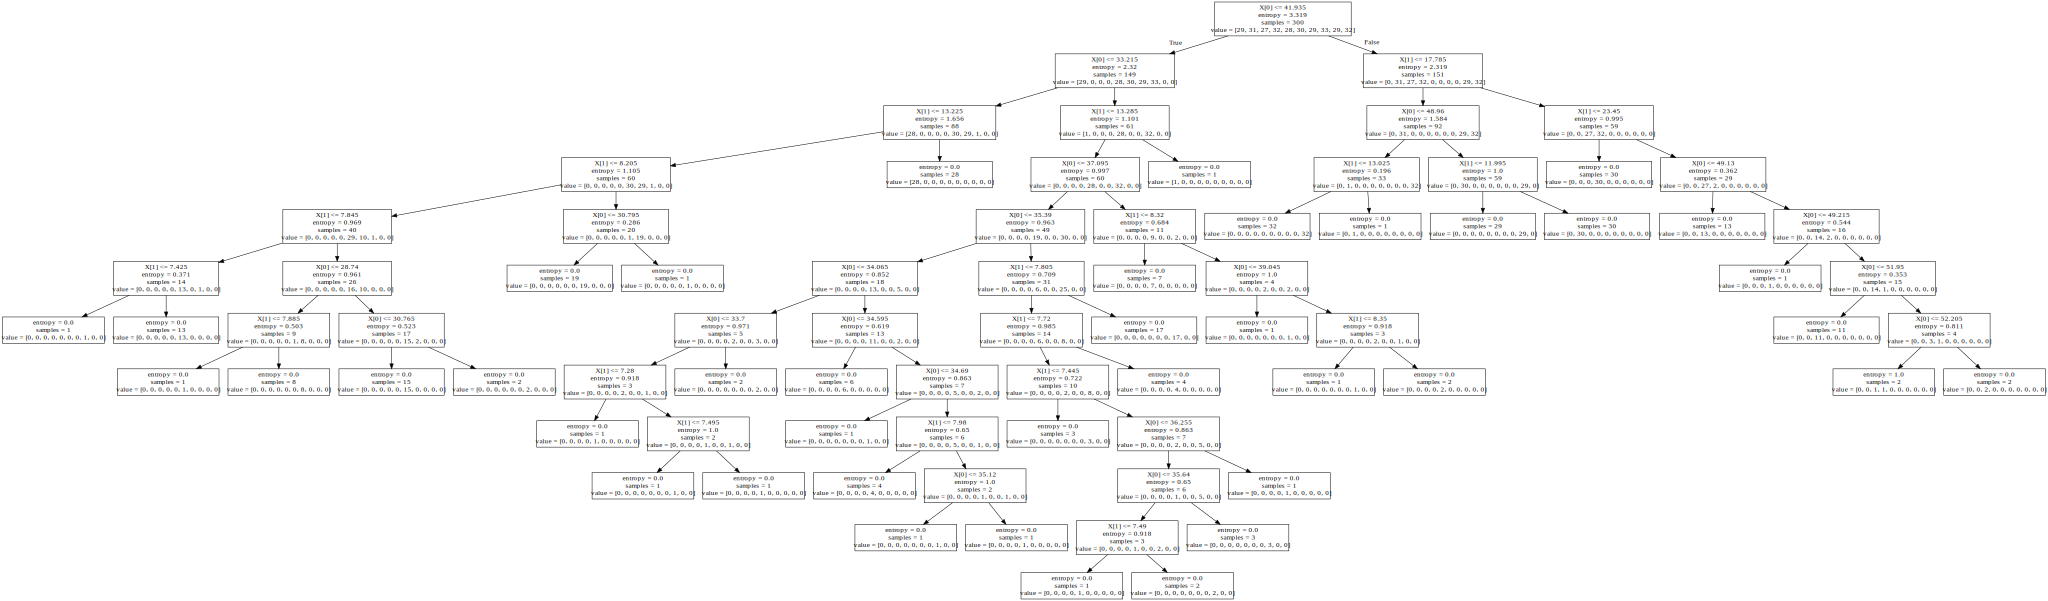

In [51]:
dot_data = StringIO()
filename = "pizzaTree.png"
pizza_no_id_entropy
dot_data = export_graphviz(pizza_no_id_entropy)  
graph = graphviz.Source(dot_data)
SVG(graph.pipe(format='svg'))

The decision tree classifier provide a very good model for predciting the type of pizza based on the values of the variables measured.

### Knearest algorithm

In [77]:
x = pizza_no_brand 
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = pizza_no_id['brand'].values
print('Sin/Con ajuste:', x.shape,  X.shape)

Sin/Con ajuste: (300, 7) (300, 7)


In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=4,stratify=y)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (255, 7) (255,)
Test set: (45, 7) (45,)


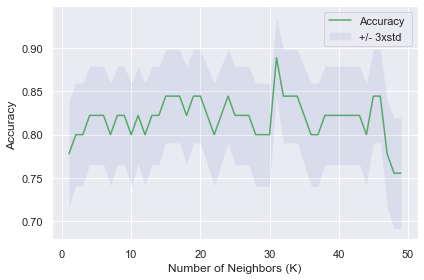

The best test accuracy was with 0.8888888888888888 with k = 31
Train set Accuracy:  0.6980392156862745


In [54]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):  
    knc = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knc.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best test accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knc.predict(X_train)))

There is a 89% accuracy in predicting the type of pizza with knearest neighbor classifier.

### SVM algorithm

In [55]:
def plot_confusion_matrix_adjust(cm, classes, normalize=False,title='Confusion matrix'):
    if normalize == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    ticks_marks = np.arange(len(classes))
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='g',yticklabels=classes,xticklabels=classes) 
    ax.xaxis.set_label_position('top')
    ax.autoscale(enable=True) # To fix scale 
    plt.tight_layout()
    plt.title(title, y = 1.1)
    plt.ylabel('Actual Label')
    plt.xlabel('Prediction Label')

Confusion matrix, without normalization


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1_Score 0.8126984126984127
Jaccard 0.8444444444444444
Accuracy: 0.8444444444444444
Precision: 0.7995061728395061
Recall: 0.8444444444444444


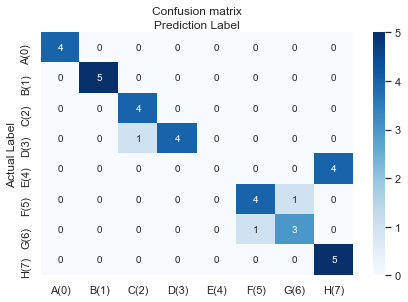

In [89]:
clf_rbf = svm.SVC(kernel='linear', gamma='scale') # rbf,sigmoid,poly(degree=8, no gamma) don't give as good results
clf_rbf.fit(X_train, y_train)
y_predict_rbf = clf_rbf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict_rbf, labels=[0,1,2,3,4,5,6,7])
#print(confusion_matrix(y_test, y_predict_rbf))
plot_confusion_matrix_adjust(cnf_matrix, classes=['A(0)','B(1)','C(2)','D(3)','E(4)','F(5)','G(6)','H(7)','I(8)','J(9)'],normalize= False,title='Confusion matrix')
print('F1_Score', f1_score(y_test, y_predict_rbf, average='weighted')) 
print('Jaccard', jaccard_similarity_score(y_test, y_predict_rbf))
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_rbf))
print("Precision:",metrics.precision_score(y_test, y_predict_rbf, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predict_rbf, average='weighted'))
#print (classification_report(y_test, y_predict_rbf))

In general the prediction of the type of pizza is ok, thus the model is well trained.
The worst pizza types to predict are E (may be a mix of so many stuff), H, and G.
Some pizza types should be easier to predict, for example with lots of meat (prot), fruits/vegetables (moist, carbs), or cheese(fat, cal).

### Assembly methods with classifiers:

In [121]:
dtc = DecisionTreeClassifier().fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print('Acuraccy DT:', accuracy_score(y_test, dtc_pred))

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50).fit(x_train, y_train)
bag_pred = bag.predict(x_test)
print('Acuraccy Bagging DT:', accuracy_score(y_test, bag_pred))

knn = KNeighborsClassifier().fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print('Acuraccy KNN:', accuracy_score(y_test, knn_pred))

bag = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=50).fit(x_train, y_train)
bag_pred = bag.predict(x_test)
print('Acuraccy Bagging KNN:', accuracy_score(y_test, bag_pred))

booster = GradientBoostingClassifier(n_estimators=50).fit(x_train, y_train)
boost_pred = booster.predict(x_test)
print('Acuraccy GBC:', accuracy_score(y_test, boost_pred))

booster = AdaBoostClassifier(n_estimators=50).fit(x_train, y_train)
boost_pred = booster.predict(x_test)
print('Acuraccy Ada:', accuracy_score(y_test, boost_pred))

Acuraccy DT: 0.87
Acuraccy Bagging DT: 0.88
Acuraccy KNN: 0.88
Acuraccy Bagging KNN: 0.87
Acuraccy GBC: 0.85
Acuraccy Ada: 0.27


The consensus from different expert models are good predictors as well.
It seems that in general predicting the type of pizza from the amounts of different variable components is good.

### Let's test the predition of the model by doing cross-validations:

In [59]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [103]:
x = pizza_no_brand
X = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = pizza_no_id['brand']

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)
print('Train/Test x:', x_train.shape, x_test.shape)

Train set: (240, 7) (240,)
Test set: (60, 7) (60,)
Train/Test x: (240, 7) (60, 7)


In [107]:
tree = DecisionTreeClassifier()
score = cross_val_score(tree, X, y, scoring = 'accuracy', error_score = np.nan, cv = 3)
np.abs(np.mean(score)) # x (without StandardScaler) gives 0.89. There is no much difference.

0.8999323779465325

In [118]:
kf = KFold(n_splits=3, shuffle=True)   ## X doesn't work 'cause it's a numpy.ndarray and it's no .loc attribute 
for train_index, test_index in kf.split(x):
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    print('Accuracy:\t', accuracy_score(y_pred, y_test)) # The accuracy is really low with False shuffle

Accuracy:	 0.9
Accuracy:	 0.87
Accuracy:	 0.86


Cross-validations results are good for DTC and Kfold.
This means that if I test a totally different dataset of types of pizzas, the trained model should do a good prediction.

### Clustering algorithms:

Evaluation metrics:

Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are).

The Silhouette Score is from -1 to 1 and show how close or far away the clusters are from each other and how dense the clusters are.
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

For more see here: https://towardsdatascience.com/clustering-why-to-use-it-16d8e2fbafe

In [242]:
x = pizza_no_brand
y = pizza_no_id['brand'].values

#### KMeans Clustering:

In [245]:
KMeans_clustering = KMeans(n_clusters=9, max_iter=1000) # From 1-10 the best accuracy is with 9 clusters.
KMeans_clustering.fit(x)
labels = classifier.labels_
y_kmeans = classifier.predict(x)
acc = metrics.adjusted_rand_score(y, y_kmeans) #NO usar este y porque es el que ya se uso.
acc  

0.7763699019668417

In [305]:
print(KMeans_clustering.inertia_)
print(metrics.silhouette_score(x,y)) # using the optional parameter: metric='euclidean' gives the same results

2466.8812926972105
0.415881904278483


There are some types of pizza that are difficult to separate into different groups given the provided features,
although the accuracy is good the inertia and the silhouette are bad.

#### Mini-Batch KMeans Clustering:

In [283]:
MKM = MiniBatchKMeans(n_clusters=8, batch_size=5)
MKM.fit(x)
y_MKM = MKM.predict(x)
acc = metrics.adjusted_rand_score(y, y_MKM)
acc
#MKM.inertia_

0.7216106455934505

In general, clustering with better scores are obtained when the # of clusters is approx. to the # of features.
This means that most of the pizza types make a group clearly distinctive from the other types.
There are 10 types of pizza in the dataset.

#### Agglomerative Clustering:

In [354]:
agglom = AgglomerativeClustering(n_clusters = 10, linkage = 'complete')
agglom.fit(x,y)

# Calcular x_min y x_max


dist_matrix = distance_matrix(x_min,x_max)
#print(dist_matrix)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


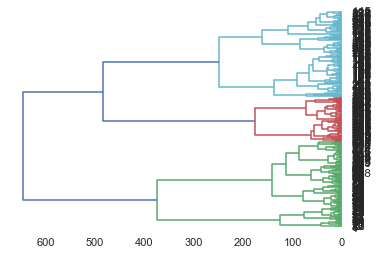

In [355]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'left')

#### DBSCAN Clustering (Density Based Method):

In [294]:
dbs = DBSCAN(eps=.15, min_samples=4, metric='euclidean').fit(X) # eps=maximum radius of a neighborhood
labels = dbs.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

9

In [299]:
clustering.inertia_
silhouette_score(x, y)

0.415881904278483

In general, clustering doesn't work well, except for 8-9 clusters. The silhouette & inertia scores are not good.

#### The purpose of this exercise was two-fold:
1) To practice the correct implementation of the different algorithms and understand the coding involved.

2) To understand the algorithms and recognize which ones are the best descriptors and predictors for the data set

### Conclusions:

__Number 1__: It was mainly accomplished, although there are a couple of errors and some questions.

__Number 2__: It can be seen it the `scatter plot` that there are variables with positive, negative and no-apparent correlation. In addition, the `correlation plot` shows some positive correlations. Thus, some regression analysis may be useful. In addition, the predicting variable have clear groups, thus classification algorithms should work as well.

The `regression analysis` gave _good results_ with and without considering PCA. Specifically, the best regression algorithms were _Random Forest_ and _GBR_ with approx. 91% fit.

The prediction of the type of pizza with `classifiers` has _good accuracy_, approx. 89%.
The worst pizza types to predict are E, H, and G. Some pizza types should be easier to predict, for example those with lots of meat (prot), or fruits/vegetables (moist, carbs), cheese(fat, cal).

`Clustering` with _KMeans_, _Mini-Batch KMeans_ have _good scores_ when the number of clusters approx. those of the types of pizza, although the _evaluation metrics (silhouette and inertia) are low_.  In general, the algorithms for clustering don't seem to clearly find similar object classes, without a priori knowledge of them (e.g., pizza types).

The consensus from different `expert models` are _good predictors_ as well.
It seems that in general predicting the type of pizza from the amounts of different variable components is good.

Lastly, the `cross-validations` results are _good for DTC and Kfold_. This means that if I test a totally different dataset of types of pizzas, the trained model should do a good prediction. 